In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [34]:
# Let's load our weapons !!!

import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tfd2
from tensorflow import keras
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import PIL
from PIL import Image

from sklearn.model_selection import train_test_split
from zipfile import ZipFile

In [2]:
classes= glob.glob('/kaggle/input/gtsrb-german-traffic-sign/Train/*')

#with open('/kaggle/input/train') as f:
    

In [3]:
no_classes=len(classes)
no_classes

43

In [72]:
# Classes of trafic signs
classes_types = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [4]:
# To Store and data in labels 

data=[]
label=[]


In [5]:
# Lets load and process our train data

cur_path="/kaggle/input/gtsrb-german-traffic-sign/Train"
for cla in range(no_classes):
    path=os.path.join(cur_path,str(cla))
    
    images=os.listdir(path)
    
    for item in images:
        try:
            image=Image.open(path+'/'+item)
            image=image.resize((30,30))
            image=np.array(image)

            data.append(image)
            label.append(cla)
        except Exception as e:
            print(e)
        
        
        
        
    

In [17]:
# In a similar way we load our test data as well

test_data=[]
test_label=[]

test_csv_path="/kaggle/input/gtsrb-german-traffic-sign/Test.csv"

test_df=pd.read_csv(test_csv_path)

test_path="/kaggle/input/gtsrb-german-traffic-sign"


In [68]:
test_img_paths=test_df['Path'].values
test_label=test_df['ClassId']
test_label=test_label.values
test_data=[]

In [18]:
for pth in test_img_paths:
    image=Image.open(test_path+"/"+pth)
    image=image.resize((30,30))
    image=np.array(image)
    
    test_data.append(image)
    

In [59]:
test_data=np.array(test_data)
test_label=np.array(test_label)

In [65]:
len(test_label)

12630

In [25]:
print(len(data))

sum=0

for i in range(43):
    sum+=len(os.listdir(cur_path+"/"+str(i)))

print(sum)

39209
39209


In [26]:
data=np.array(data)
label=np.array(label)

In [27]:
print(data.shape)
print(label.shape)

(39209, 30, 30, 3)
(39209,)


In [30]:
x_train,x_test,y_train,y_test = train_test_split(data,label,test_size=0.8,random_state=42)

# Convert Labels into One hot Vectors

In [31]:
y_train=to_categorical(y_train,43)
y_test=to_categorical(y_test,43)

In [36]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

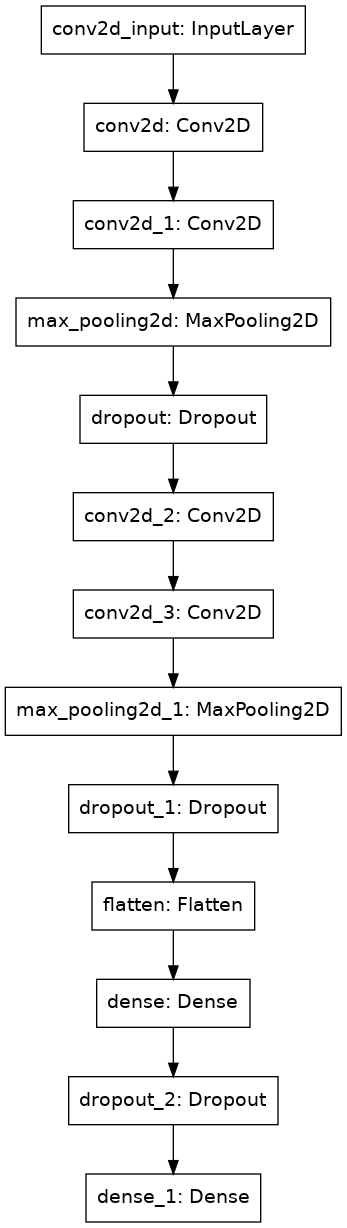

In [38]:
keras.utils.plot_model(model)

In [39]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
epochs = 20
hist = model.fit(x_train, y_train, batch_size=32, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/20
246/246 [==============================] - 6s 13ms/step - loss: 6.4908 - accuracy: 0.0995 - val_loss: 2.0198 - val_accuracy: 0.5454
Epoch 2/20
246/246 [==============================] - 3s 12ms/step - loss: 2.1801 - accuracy: 0.4276 - val_loss: 1.1896 - val_accuracy: 0.7285
Epoch 3/20
246/246 [==============================] - 3s 11ms/step - loss: 1.5459 - accuracy: 0.5680 - val_loss: 0.7909 - val_accuracy: 0.8211
Epoch 4/20
246/246 [==============================] - 3s 12ms/step - loss: 1.2646 - accuracy: 0.6466 - val_loss: 0.6396 - val_accuracy: 0.8330
Epoch 5/20
246/246 [==============================] - 3s 11ms/step - loss: 1.0431 - accuracy: 0.7000 - val_loss: 0.4685 - val_accuracy: 0.8725
Epoch 6/20
246/246 [==============================] - 3s 13ms/step - loss: 0.9401 - accuracy: 0.7253 - val_loss: 0.3693 - val_accuracy: 0.8999
Epoch 7/20
246/246 [==============================] - 3s 12ms/step - loss: 0.8681 - accuracy: 0.7453 - val_loss: 0.3232 - val_accuracy: 0.9076

In [41]:
train_loss=hist.history['loss']
cv_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
cv_acc=hist.history['val_accuracy']

In [42]:
# printing a table depicting the detail about the trained model
log_frame = pd.DataFrame(columns = ["Epoch", "Train_Loss", "Train_Accuracy", "CV_Loss", "CV_Accuracy"])
log_frame["Epoch"] = list(range(1,21))
log_frame["Train_Loss"] = train_loss
log_frame["Train_Accuracy"] = train_acc
log_frame["CV_Loss"] = cv_loss
log_frame["CV_Accuracy"] = cv_acc 
log_frame

,Epoch,Train_Loss,Train_Accuracy,CV_Loss,CV_Accuracy
0,1,3.707914,0.191302,2.019794,0.545397
1,2,1.999647,0.468435,1.189609,0.728481
2,3,1.459605,0.592526,0.790904,0.821123
3,4,1.217891,0.657569,0.639592,0.833015
4,5,1.025377,0.704630,0.468456,0.872545
5,6,0.907955,0.739064,0.369267,0.899866
6,7,0.818717,0.759852,0.323218,0.907581
7,8,0.696374,0.794414,0.325990,0.909940
8,9,0.626668,0.813417,0.285528,0.915902
9,10,0.571549,0.829996,0.239361,0.930184


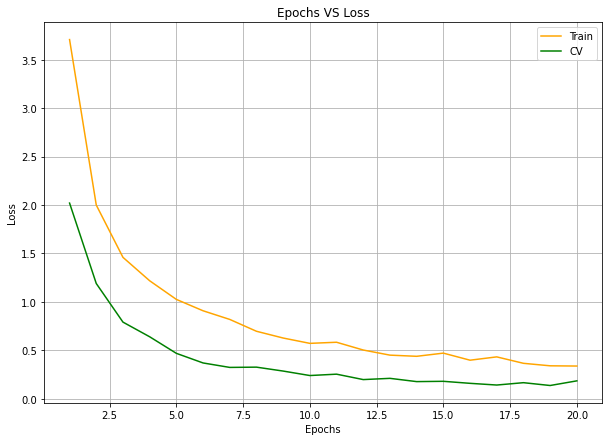

In [43]:
# Plotting Epochs vs Loss

def plotting(epoch,train_los,val_los):
    plt.figure(figsize=(10,7))
    plt.plot(epoch,train_los,color='orange',label='Train')
    plt.plot(epoch,val_los,color='green',label='CV')
    plt.grid()
    plt.title("Epochs VS Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

plotting(log_frame['Epoch'],log_frame['Train_Loss'],log_frame['CV_Loss'])

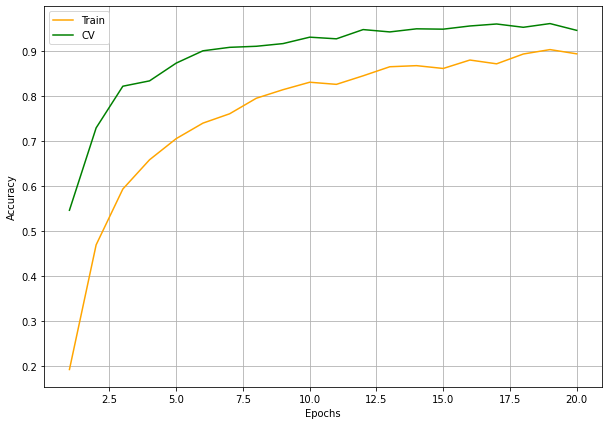

In [44]:
# Plotting Epoch Vs Accuracy

def plot_acc(epoch,train_ac,val_ac):
    plt.figure(figsize=(10,7))
    plt.plot(epoch,train_ac,color='orange',label='Train')
    plt.plot(epoch,val_ac,color='green',label='CV')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend()
    
plot_acc(log_frame['Epoch'],log_frame['Train_Accuracy'],log_frame['CV_Accuracy'])

In [60]:
#  Predicting on the test data 

test_pred=model.predict_classes(test_data)

In [69]:
print(test_pred)
print(test_label)

[16  1 38 ...  3  7 10]
[16  1 38 ...  6  7 10]


In [70]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_label, test_pred))

0.8990498812351544


#### Model is doing reasonbly good, but we can definetly improve this by tuning the hyperparameters

##### Let's see how it performs on some of the test images

In [73]:
def test_on_img(img):
    data2=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data2.append(np.array(image))
    X_test=np.array(data2)
    Y_pred = model.predict_classes(X_test)
    return image,Y_pred

Predicted traffic sign is:  Yield


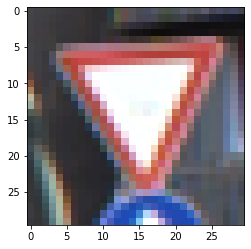

Predicted traffic sign is:  Right-of-way at intersection


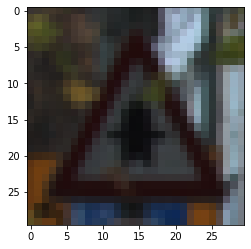

Predicted traffic sign is:  Road work


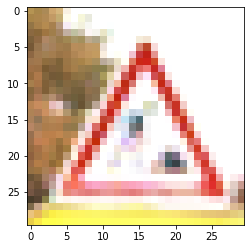

Predicted traffic sign is:  Children crossing


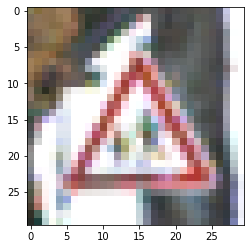

Predicted traffic sign is:  End no passing veh > 3.5 tons


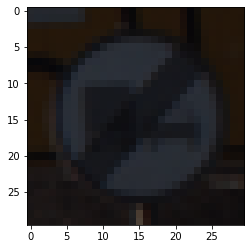

In [84]:
import random
files=os.listdir('/kaggle/input/gtsrb-german-traffic-sign/Test')


for i in range(5):
    pth=random.choice(files)    
    plot,prediction = test_on_img("/kaggle/input/gtsrb-german-traffic-sign/Test/"+pth)
    s = [str(i) for i in prediction] 
    a = int("".join(s)) 
    print("Predicted traffic sign is: ", classes_types[a])
    plt.imshow(plot)
    plt.show()